In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')
url_get.content[1:1000]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="AP" />\n<base href="https://www.exchange-rates.org/" />\n<link rel="dns-prefetch" href="https://ajax.googleapis.com/" />\r\n<link rel="dns-prefetch" href="https://www.google-analytics.com/" />\r\n<link rel="preload" href="https://dol8qrceshfrq.cloud

In [2]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [3]:
print(soup.prettify()[:3000])

<!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="C#" name="CODE_LANGUAGE">
   <meta content="JavaScript" name="vs_defaultClientScript"/>
   <meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
    <meta content="AP" name="mapping"/>
    <base href="https://www.exchange-rates.org/"/>
    <link href="https://ajax.googleapis.com/" rel="dns-prefetch"/>
    <link href="https://www.google-analytics.com/" rel="dns-prefetch"/>
    <link as="image" href="https://dol8qrceshfrq.cloudfront.n

In [4]:
table = soup.find('table', attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    11/26/2020
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/11-26-2020">
     14,090.70769
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/11-26-2020">
     USD IDR rate for 11/26/2020
    </a>
   </td>
  </tr>
  <tr>
   <td>
    11/25/2020
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/R


In [5]:
tr = table.find_all('tr')
tr[:2]

[<tr><td>11/26/2020</td><td>Thursday</td><td><a href="/Rate/USD/IDR/11-26-2020">14,090.70769</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-26-2020">USD IDR rate for 11/26/2020</a></td></tr>,
 <tr><td>11/25/2020</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/11-25-2020">14,136.09929</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/11-25-2020">USD IDR rate for 11/25/2020</a></td></tr>]

In [6]:
kurs = [] 

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get bulan
    period = row.find_all('td')[0].text
    period = period.strip() #for removing the excess whitespace
    
    #get inflasi
    harga = row.find_all('td')[2].text
    harga = harga.strip() #for removing the excess whitespace
    
    kurs.append((period,harga)) 
    
kurs = kurs[::-1]
kurs

[('5/31/2020', '14,664.14584 IDR'),
 ('6/1/2020', '14,586.73900 IDR'),
 ('6/2/2020', '14,382.27395 IDR'),
 ('6/3/2020', '14,060.78946 IDR'),
 ('6/4/2020', '14,113.82802 IDR'),
 ('6/5/2020', '14,305.96407 IDR'),
 ('6/7/2020', '13,989.39489 IDR'),
 ('6/8/2020', '13,867.95377 IDR'),
 ('6/9/2020', '13,870.75718 IDR'),
 ('6/10/2020', '13,976.91611 IDR'),
 ('6/11/2020', '13,966.85142 IDR'),
 ('6/12/2020', '14,121.55442 IDR'),
 ('6/14/2020', '14,145.23543 IDR'),
 ('6/15/2020', '14,021.62200 IDR'),
 ('6/16/2020', '14,046.73959 IDR'),
 ('6/17/2020', '14,120.02241 IDR'),
 ('6/18/2020', '14,095.36729 IDR'),
 ('6/19/2020', '14,077.63950 IDR'),
 ('6/21/2020', '14,068.55627 IDR'),
 ('6/22/2020', '14,136.05128 IDR'),
 ('6/23/2020', '14,148.27391 IDR'),
 ('6/24/2020', '14,143.17320 IDR'),
 ('6/25/2020', '14,130.57047 IDR'),
 ('6/26/2020', '14,190.21303 IDR'),
 ('6/28/2020', '14,185.08225 IDR'),
 ('6/29/2020', '14,183.53912 IDR'),
 ('6/30/2020', '14,296.90560 IDR'),
 ('7/1/2020', '14,256.13040 IDR'),
 

In [7]:
import pandas as pd
import numpy as np

kurs_rupiah = pd.DataFrame(kurs, columns = ('period','harga'))
kurs_rupiah['period'] = kurs_rupiah['period'].astype('datetime64')
kurs_rupiah['harga'] = kurs_rupiah['harga'].str.replace(" IDR","")
kurs_rupiah['harga'] = kurs_rupiah['harga'].str.replace(",","")
kurs_rupiah['harga'] = kurs_rupiah['harga'].astype('float64')
kurs_rupiah['harga'] = kurs_rupiah['harga'].round(2)
kurs_rupiah.dtypes


period    datetime64[ns]
harga            float64
dtype: object

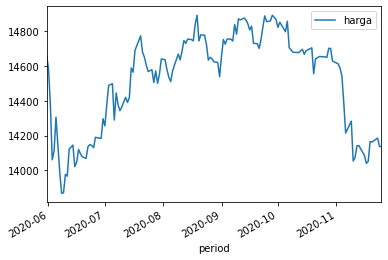

In [10]:
import matplotlib as plt
kurs_rupiah.plot(x = 'period')

In [9]:
kurs_rupiah.to_csv('kursrupiah.csv')